<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 2 </div>
<div style="text-align: right"> <font color='Gray'> Constanza Rivas Ortega </div>

    
***

## Modelo de la regla de la mayoría

La regla de la mayoría es un modelo de dinámica de opinión que describe cómo se esparcen las opiniones de una minoría en debates públicos. Los individuos que conforman el sistema se mueven en grupos de distintas geometrías (casa, trabajo, iglesias, bares) donde se relaciona con otros individuos con distintas opiniones.

El sistema que propone tiene $N$ individuos, que tienen un tiempo dado para discutir sus opiniones respecto a una propuesta inicial y luego decidir si cambian o no cambian su opinión. En un tiempo $t$ anterior a la discusión, en el grupo hay personas con opinión $N_{+}(t)$ y $N_{-}(t)$ que están a favor y en contra del individuo, respectivamente. La suma de las opiniones debe cumplir que $N_{+}(t) + N_{-}(t) = N$.

Las probabilidades de que cada individuo esté a favor o en contra de la propuesta inicial están dadas por $P_{\pm} (t) = \frac{N_{\pm}(t)}{N}$, donde $P_{+}(t) + P_{-}(t)=1$.

Los grupos con distintas simetrías con las que interactúa el individuo cumplen que $\sum_{i=1}^{L}$, donde $i = 1,2,...,L$ es el tamaño del grupo (L siendo el más grande) y $a_i$ la probabilidad con la que lo frecuenta.

La probabilidad de que el individuo haya cambiado su opinión en un tiempo $t+1$ (después de la discusión) según lo que diga la mayoría, está dado por

$P_{+}(t+1) = \sum_{k=1}^{L} a_k \sum_{j=N[k/2 + 1]}^{k} C_{j}^{k} P_{+}(t)^{j}P_{-}^{k-j}$,

$P_{-}(t+1) = \sum_{k=1}^{L} a_k \sum_{j=N[k/2 + 1]}^{k} C_{j}^{k} P_{-}(t)^{j}P_{+}^{k-j}$,

donde $C_{j}^{k} = \frac{k!}{(k-j)!j!}$ y $N[k/2 + 1]$ la parte entera de $k/2 + 1$.

## Simulacion

La simulación consta de una función que recibe el tamaño del sistema $N$ y las probabilidades $a_n$ de frecuentar cada uno de los grupos como una lista (la cantidad $L$ de grupos es el largo de la lista ingresada).

La probabilidad $P_{+}(t)$ se entrega como una lista entre 0 y 1. La función itera el modelo de la regla de la mayoría para la cantidad de elementos que tenga la lista. Se calcula $P_{+}(t+1)$ para cada uno de estos puntos, y finalmente se grafica dos veces para dos simulaciones distintas: una para un individuo que frecuentó seis grupos (línea punteada) y otra para un individuo que frecuentó tres (línea continua).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm.auto import tqdm

def majority_rule_model(N, a_n, P_t):
    '''
    INPUT
    N : numero de individuos
    a_n : parametros a_n (lista)
    P_t : probabilidad P_{+}(t)

    '''    
    
    # INICIO CONTADOR TEMPORAL
    tini = datetime.now()
    
    # CONDICION INICIAL
    P_t1_list = [0] * len(P_t)
    L = len(a_n)
    
    # ALGORITMO
    for i in range(len(P_t)): # itera sobre P_{+}(t) entre 0 y 1
        P_t1 = 0
        for k in range(1,L+1):
            s2 = 0
            for j in range(int(np.rint((k/2)+1)),k+1):
                C = (np.math.factorial(k))/((np.math.factorial(k-j)*np.math.factorial(j)))
                s2 += C * (P_t[i]**j) * ((1 - P_t[i])**(k-j))
            P_t1 += a_n[k-1] * s2 # P_{+}(t+1)
        P_t1_list[i] = P_t1
        
    # FIN CONTADOR TEMPORAL
    tfin = datetime.now()
    dtie = tfin - tini
    print('Tiempo ocupado (h:m:s:ns):', dtie)
    
    return P_t1_list

Tiempo ocupado (h:m:s:ns): 0:00:00.002994
Tiempo ocupado (h:m:s:ns): 0:00:00.000994


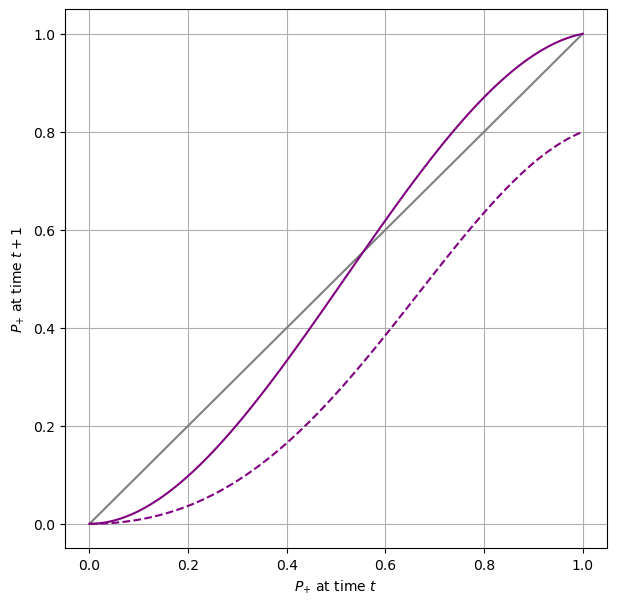

In [2]:
P_t = np.linspace(0,1,100)

dashed_line = majority_rule_model(10, [0.2,0.2,0.2,0.2,0.1,0.1], P_t)
plain_line = majority_rule_model(10,[0,0.1,0.9], P_t)

# CONFIGURACION FIGURA
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 7))

# FIGURA
ax.plot([0,1],[0,1],color='gray')
ax.plot(P_t, dashed_line, color='purple', ls='--')
ax.plot(P_t, plain_line, color='purple')
ax.set_xlabel("$P_{+}$ at time $t$")
ax.set_ylabel("$P_{+}$ at time $t+1$")
ax.grid(True)
plt.show()